In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2

model_input_size = (224, 224)
model_path = 'weights/mobilenet-finetune/'

tf.__version__

'2.4.0-dev20201002'

In [2]:
model = tf.keras.models.load_model(model_path)

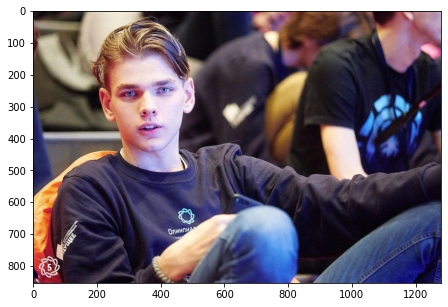

In [3]:
img = cv2.imread('data/img2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10, 5))
plt.imshow(img)

## Single image prediction

Prediction: True


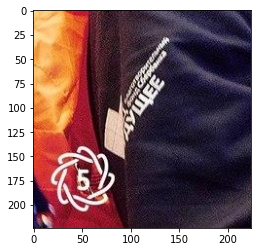

In [4]:
patch = img[-model_input_size[0]:, :model_input_size[0]]
prediction = model(patch[np.newaxis]) > 0
plt.imshow(patch)
print('Prediction:', prediction.numpy()[0][0])

## Prediction on segments of subdivision

In [5]:
patches_coords = [[x, x + model_input_size[0], y, y + model_input_size[1]]
                   for x in range(0, img.shape[0], model_input_size[0])
                   for y in range(0, img.shape[1], model_input_size[1])]
patches = [cv2.resize(img[c[0]:c[1], c[2]:c[3]], model_input_size) for c in patches_coords]

predictions = model(np.array(patches)).numpy() > 0

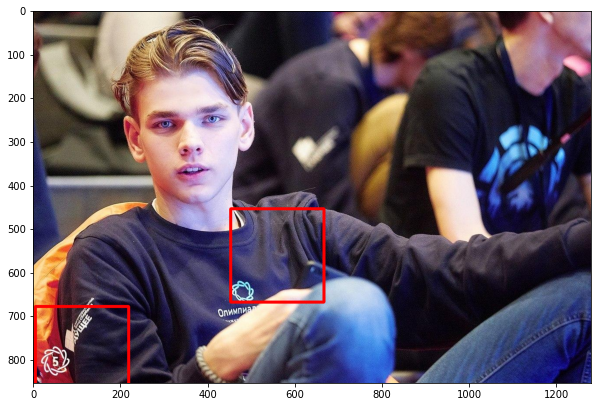

In [6]:
img_to_draw = img.copy()
for i, coords in enumerate(patches_coords):
    if predictions[i]:
        eps = 5
        img_to_draw = cv2.rectangle(img_to_draw, 
                                    (coords[2] + eps, coords[0] + eps), 
                                    (coords[3] - eps, coords[1] - eps), 
                                    (255, 0, 0), 5)
plt.figure(figsize=(10, 10))
plt.imshow(img_to_draw)

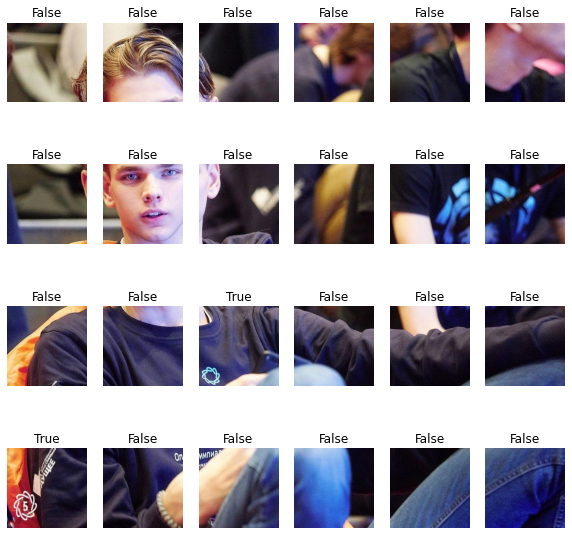

In [7]:
plt.figure(figsize=(10, 10))
for i in range(24):
    ax = plt.subplot(4, 6, i + 1)
    plt.imshow(patches[i].astype('uint8'))
    prediction = model(np.array([patches[i]]))[0][0] > 0
    plt.title(f'{prediction}')
    plt.axis("off")